# Sentiment Analysis using TF-IDF

some code snippets (modified) from : https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3

In [1]:
#load data from sentiment_analysis.csv into pandas df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import math
#drop Unnamed: 0 column
df= pd.read_csv('Data/sentiment_analysis.csv', index_col=0)
df.head()

,source,date,title,words,body,tokenized_text,neg,neu,pos,compound,sentiment
51,The New York Times,2019-04-08,9 Hong Kong Democracy Advocates Convicted for ...,932,\nHONG KONG — Nine democracy activists on Tues...,hong kong nine democracy activists tuesday con...,0.138,0.751,0.112,-0.8622,negative
387,South China Morning Post,2019-05-16,Six activists found guilty over liaison office...,384,\nSix pro-democracy activists were yesterday f...,six prodemocracy activists yesterday found gui...,0.169,0.756,0.075,-0.9552,negative
271,South China Morning Post,2019-06-10,SOLIDARITY AND DEFIANCE Organisers say more th...,951,\nProtesters of all ages and from all walks of...,protesters ages walks life flooded streets hon...,0.119,0.799,0.082,-0.9612,negative
173,The New York Times,2019-06-11,"Bricks, Bottles and Tear Gas_ Protesters and P...",1661,\nRiot police turned downtown Hong Kong into a...,riot police turned downtown hong kong teargasf...,0.192,0.714,0.094,-0.9983,negative
276,South China Morning Post,2019-06-11,"Police faced 'organised, armed and prepared ra...",887,"\nOrganised, prepared, armed and radical - tha...",organised prepared armed radical police descri...,0.176,0.755,0.068,-0.9939,negative


In [2]:
# make sure the data is in the right format to be used in the model
df['tokenized_text']= df['tokenized_text'].apply(gensim.utils.simple_preprocess)

In [ ]:
#create set of all words contained in all articles
all_words = set()
for text in df['tokenized_text']:
    all_words.update(text)

In [ ]:
#calculate term frequency
tf = {}
for index, row in df.iterrows():
    tf[row['title']] = {word: row['tokenized_text'].count(word) for word in all_words}

In [ ]:
#calculate inverse document frequency
idf = {}

for word in all_words:
  freq = sum(word in row['tokenized_text'] for index, row in df.iterrows())
  idf[word] = math.log(len(df) / freq)

In [ ]:
# calculate tf-idf
tfidf = {}

for index, row in df.iterrows():
  tfidf[row['title']] = [(word, tf[row['title']][word] * idf[word]) for word in all_words]

In [ ]:
#sort tf-idf values
for key, value in tfidf.items():
  tfidf[key] = sorted(tfidf[key], key=lambda x: x[1], reverse=True)

In [ ]:
import json
with open('Data/tfidf.json', 'w') as f:
    json.dump(tfidf, f)

In [3]:
#load tf-idf values from json file
import json
with open('Data/tfidf.json', 'r') as f:
    tfidf = json.load(f)


In [4]:
#add tf-idf values to df, join on title, which is the key of the dictionary tfidf
df['tfidf'] = df['title'].map(tfidf)
df.head()

,source,date,title,words,body,tokenized_text,neg,neu,pos,compound,sentiment,tfidf
51,The New York Times,2019-04-08,9 Hong Kong Democracy Advocates Convicted for ...,932,\nHONG KONG — Nine democracy activists on Tues...,"[hong, kong, nine, democracy, activists, tuesd...",0.138,0.751,0.112,-0.8622,negative,"[[nuisance, 21.193269466192145], [convicted, 2..."
387,South China Morning Post,2019-05-16,Six activists found guilty over liaison office...,384,\nSix pro-democracy activists were yesterday f...,"[six, prodemocracy, activists, yesterday, foun...",0.169,0.756,0.075,-0.9552,negative,"[[ng, 12.787386713114179], [interpretation, 9...."
271,South China Morning Post,2019-06-10,SOLIDARITY AND DEFIANCE Organisers say more th...,951,\nProtesters of all ages and from all walks of...,"[protesters, ages, walks, life, flooded, stree...",0.119,0.799,0.082,-0.9612,negative,"[[legco, 8.840826328153678], [versus, 8.399410..."
173,The New York Times,2019-06-11,"Bricks, Bottles and Tear Gas_ Protesters and P...",1661,\nRiot police turned downtown Hong Kong into a...,"[riot, police, turned, downtown, hong, kong, t...",0.192,0.714,0.094,-0.9983,negative,"[[wednesday, 15.43318585282734], [stubborn, 13..."
276,South China Morning Post,2019-06-11,"Police faced 'organised, armed and prepared ra...",887,"\nOrganised, prepared, armed and radical - tha...","[organised, prepared, armed, radical, police, ...",0.176,0.755,0.068,-0.9939,negative,"[[lung, 11.06663836234181], [chat, 10.78070782..."


In [31]:
#explore differences in tfidf of different articles for each source
most_common_words = {}
for source in df['source'].unique():
  print(source)
  most_common = []
  df[df['source'] == source]['tfidf'].apply(lambda x: most_common.append(x[0][0]))
  df[df['source'] == source]['tfidf'].apply(lambda x: most_common.append(x[1][0]))
  df[df['source'] == source]['tfidf'].apply(lambda x: most_common.append(x[2][0]))
  most_common_words[source] = most_common

The New York Times
South China Morning Post


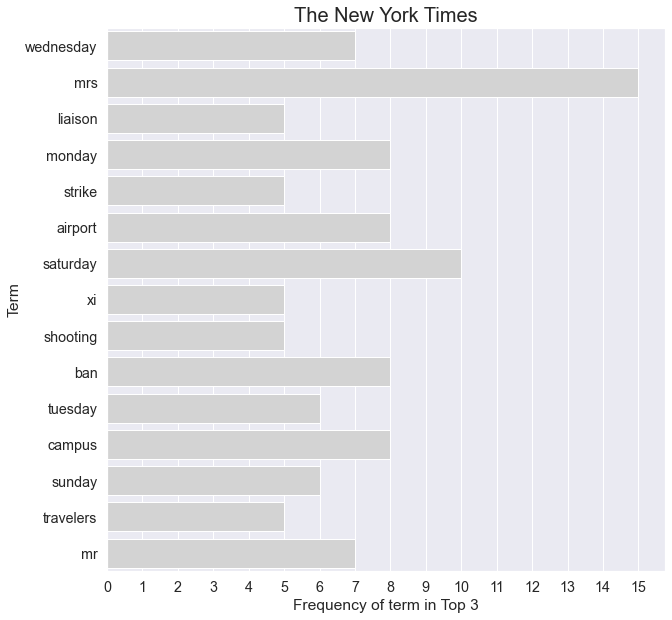

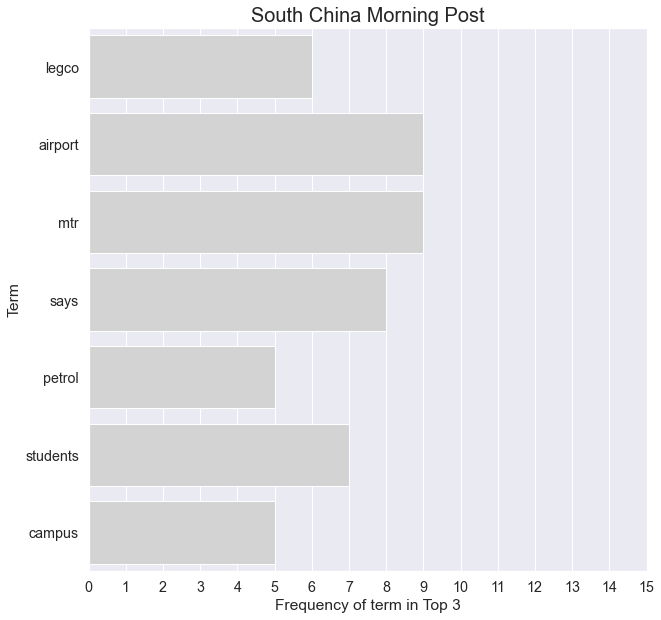

In [29]:
#create a dictionary of the most common words with their frequency for each source in the list
from tkinter import font


common_words = {}
for source in most_common_words:
    common_words[source] = {}
    for word in most_common_words[source]:
        if word in common_words[source]:
            common_words[source][word] += 1
        else:
            common_words[source][word] = 1
plot_words = {}
for key, value in common_words.items():
    plot_words[key]={}
    for k, v in value.items():
        if v > 4:
            plot_words[key][k]=v

#plot the frequency of the most common words for each source, excluding words with value less than 2
for key, value in plot_words.items():
    sns.set(font_scale=1.3)
    plt.figure(figsize=(10,10))
    sns.barplot(y=list(value.keys()), x=list(value.values()), color='lightgrey', dodge=False)
    plt.xticks(range(0, 16, 1))
    plt.title(key, fontsize=20)
    plt.xlabel('Frequency of term in Top 3')
    plt.ylabel('Term')
    plt.show()


In [39]:
#for each article, multiply the tfidf values of each word by the sentiment score of the word using nltk, save in new column
# initialize the analyzer object
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
#df['polarity'] = df['text_token'].apply(lambda x: analyzer.polarity_scores(x))
df['weighted_sentiment'] = df['tfidf'].apply(lambda x: np.sum([v[1] * analyzer.polarity_scores(v[0])['compound'] for v in x]))
# for index, row in df.iterrows():
#     row['weighted_sentiment'] = []
#     for word in row['tfidf']:
#         row['weighted_sentiment'].append(int(analyzer.polarity_scores(word[0])['compound']*word[1]))



In [40]:
df.head()

,source,date,title,words,body,tokenized_text,neg,neu,pos,compound,sentiment,tfidf,weighted_sentiment
51,The New York Times,2019-04-08,9 Hong Kong Democracy Advocates Convicted for ...,932,\nHONG KONG — Nine democracy activists on Tues...,"[hong, kong, nine, democracy, activists, tuesd...",0.138,0.751,0.112,-0.8622,negative,"[[nuisance, 21.193269466192145], [convicted, 2...",-6.152986
387,South China Morning Post,2019-05-16,Six activists found guilty over liaison office...,384,\nSix pro-democracy activists were yesterday f...,"[six, prodemocracy, activists, yesterday, foun...",0.169,0.756,0.075,-0.9552,negative,"[[ng, 12.787386713114179], [interpretation, 9....",-5.265856
271,South China Morning Post,2019-06-10,SOLIDARITY AND DEFIANCE Organisers say more th...,951,\nProtesters of all ages and from all walks of...,"[protesters, ages, walks, life, flooded, stree...",0.119,0.799,0.082,-0.9612,negative,"[[legco, 8.840826328153678], [versus, 8.399410...",-2.944913
173,The New York Times,2019-06-11,"Bricks, Bottles and Tear Gas_ Protesters and P...",1661,\nRiot police turned downtown Hong Kong into a...,"[riot, police, turned, downtown, hong, kong, t...",0.192,0.714,0.094,-0.9983,negative,"[[wednesday, 15.43318585282734], [stubborn, 13...",-19.067338
276,South China Morning Post,2019-06-11,"Police faced 'organised, armed and prepared ra...",887,"\nOrganised, prepared, armed and radical - tha...","[organised, prepared, armed, radical, police, ...",0.176,0.755,0.068,-0.9939,negative,"[[lung, 11.06663836234181], [chat, 10.78070782...",-14.954644


/var/folders/zn/8nxtt6mn6x7422mthq8hmz4c0000gn/T/ipykernel_2748/1016474865.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_plot.drop(["date"], 1, inplace=True)


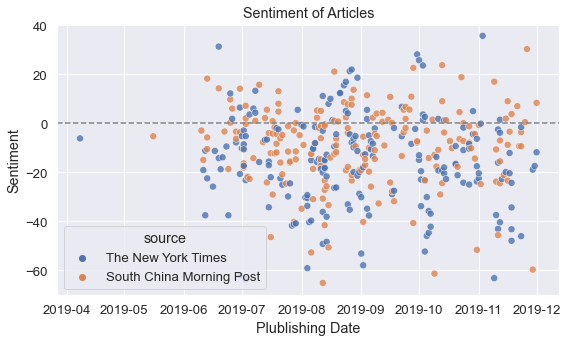

In [41]:
# visualize sentiment distribution over time

df_plot = df.set_index(pd.DatetimeIndex(df['date']))
df_plot.drop(["date"], 1, inplace=True)

sns.set(rc={'figure.figsize':(13,7)})
sns.set(font_scale=1.2)

plt.figure(figsize = (9,5))
g = sns.scatterplot(x='date', y='weighted_sentiment', data=df_plot, alpha=0.8, hue = 'source', s= 50)

g.set(title='Sentiment of Articles')
g.set(xlabel="Plublishing Date")
g.set(ylabel="Sentiment")


g.axhline(0, ls='--', c = 'grey')

/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


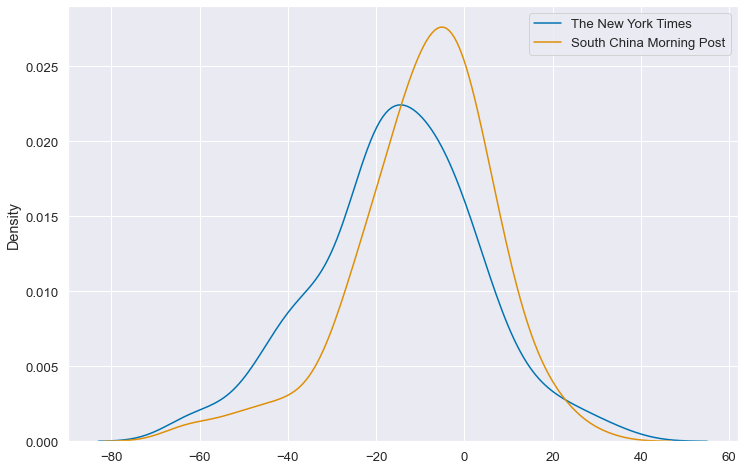

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
source_colors = list(sns.color_palette('colorblind'))
source_names = list(df['source'].unique())
for source, color in zip(source_names, source_colors):
    sns.distplot(df.loc[df['source'] == source]['weighted_sentiment'], label=source,
                               ax=ax, hist=False, color=color)
    ax.set_xlabel('')
plt.legend()
plt.show()